In [1]:
import tensorflow as tf
import tensorflow.contrib.slim as slim


In [2]:
import matplotlib.pyplot as plt

In [3]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!



Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 555:
Image - Min Value: 10 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


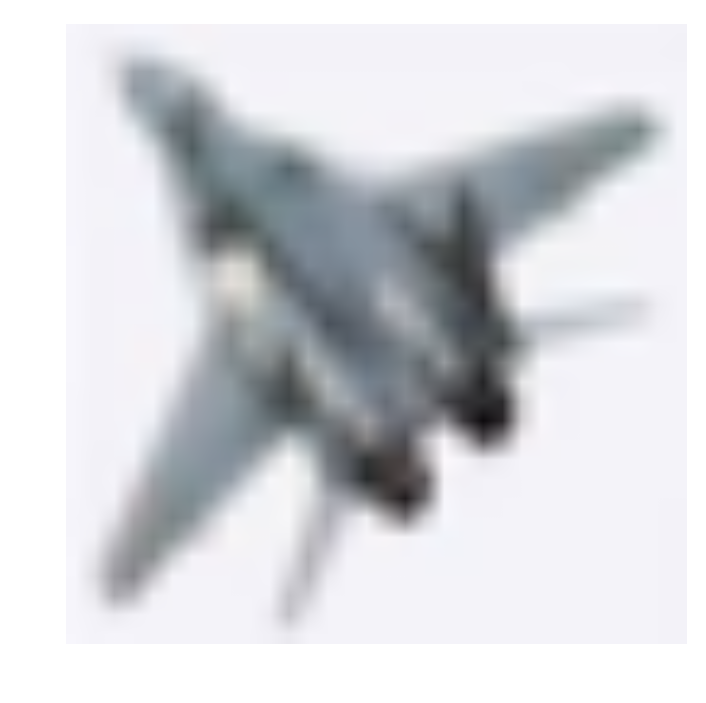

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 555
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

In [23]:
features_0, labels_0 = helper.load_cfar10_batch(cifar10_dataset_folder_path, 1)
print('Samples: {}'.format(len(features_0)))
print('Label Counts: {}'.format(dict(zip(*np.unique(labels_0, return_counts=True)))))
print('First 20 Labels: {}'.format(labels_0[:20]))




Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]


In [24]:
air=[]
mobile = []
for index,value in enumerate(labels_0):
    if value == 0:
        air.append(features_0[index])
    elif value == 1:
        mobile.append(features_0[index])

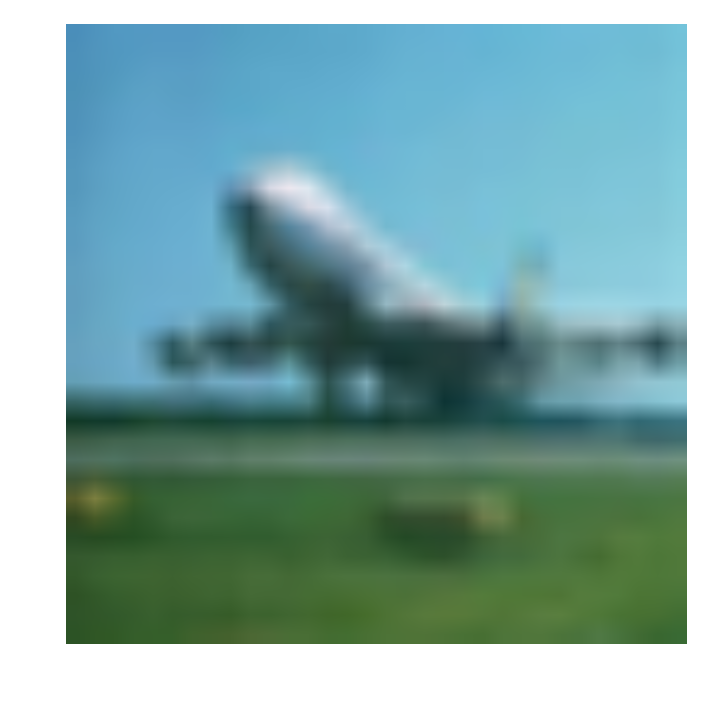

In [28]:
plt.axis('off')
# plt.imshow(air[100])
plt.imshow(air[100])

In [30]:

features_1, labels_1 = helper.load_cfar10_batch(cifar10_dataset_folder_path, 2)
print('Samples: {}'.format(len(features_1)))
print('Label Counts: {}'.format(dict(zip(*np.unique(labels_1, return_counts=True)))))
print('First 20 Labels: {}'.format(labels_1[:20]))

Samples: 10000
Label Counts: {0: 984, 1: 1007, 2: 1010, 3: 995, 4: 1010, 5: 988, 6: 1008, 7: 1026, 8: 987, 9: 985}
First 20 Labels: [1, 6, 6, 8, 8, 3, 4, 6, 0, 6, 0, 3, 6, 6, 5, 4, 8, 3, 2, 6]


In [31]:
for index,value in enumerate(labels_1):
    if value == 0:
        air.append(features_1[index])
    elif value == 1:
        mobile.append(features_1[index])

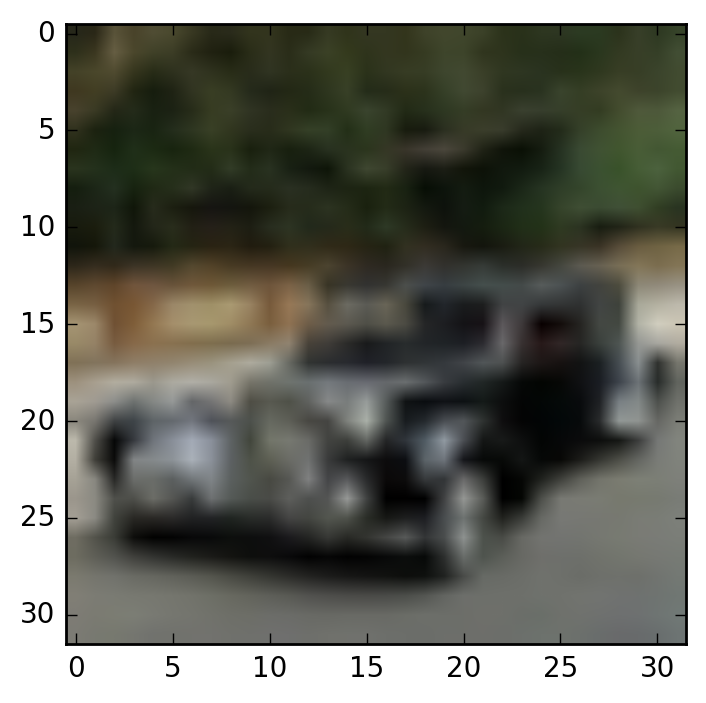

In [38]:
# print(features[0].shape)
plt.imshow(mobile[1716])

In [39]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    print("normalize x.shape = ",x.shape)
    return x / 255.0


tests.test_normalize(normalize)

normalize x.shape =  (984, 32, 32, 3)
Tests Passed


In [40]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
#     print(x.shape)
   
    m = len(x)
    print('one_hot_encode y leng  = ',m)
    unit = np.eye(10)
    out = np.zeros((m,10))
    for i in range(0,m):
        out[i] = unit[x[i],:]
    #print('out shape  = ',out.shape)    
    return out


tests.test_one_hot_encode(one_hot_encode)

one_hot_encode y leng  =  88
one_hot_encode y leng  =  5
Tests Passed


In [ ]:
# Preprocess Training, Validation, and Testing Data
# helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [ ]:
"""
preprocess_validation point
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))
print('valid_features.shape = ',valid_features.shape)

In [ ]:


def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    print(image_shape)
    # TODO: Implement Function
    
    return tf.placeholder(dtype=tf.float32,shape=(None,*image_shape),name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,shape=(None,n_classes),name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(dtype=tf.float32,name='keep_prob')

def neural_net_regulation_scale():
    return tf.placeholder(dtype=tf.float32,name='reguloss')

def neural_new_is_training():
    return tf.placeholder(dtype=tf.bool,name='is_training')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

In [ ]:
from model.small_resnet import *
import numpy as np

In [ ]:
##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
reg_loss = neural_net_regulation_scale()
is_training = neural_new_is_training();

# Model

prelogits,_ = inference(x, keep_prob, phase_train=is_training, bottleneck_layer_size=512, weight_decay=5e-5)
logits = slim.fully_connected(prelogits, 10, activation_fn=None, weights_initializer=tf.truncated_normal_initializer(stddev=0.1), \
                              weights_regularizer=slim.l2_regularizer(5e-4),scope='Logits', reuse=False)

logits = tf.identity(logits, name='logits')

cross_entropy_mean = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)) 
regule_loss = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

cost = tf.add_n([cross_entropy_mean]+regule_loss,name='cost')

In [ ]:
# cost += regulation_cost
global_step = tf.Variable(0,trainable=False)
initial_learning_rate = 0.003
learning_rate = tf.train.exponential_decay(initial_learning_rate,global_step=global_step,decay_steps=500,decay_rate=0.95,staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost, global_step=global_step)



# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


In [ ]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    
    session.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability,is_training:True})

#     _,costp,regule_lossp,learnp,stepp = session.run([optimizer,cost,regule_loss,learning_rate,global_step],feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability,is_training:True})
#     print("costp ={}, regule_lossp= {}, learnp={},stepp ={}".format(costp,regule_lossp,learnp,stepp))


# """
# DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
# """
tests.test_train_nn(train_neural_network)

In [ ]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss ,regule_loss_p = session.run([cost,regule_loss],feed_dict={x:feature_batch,y:label_batch,keep_prob:1.0,is_training:True})
    valid_acc = session.run(accuracy,feed_dict={x:valid_features,y: valid_labels,keep_prob:1.0,is_training:False})
    print('Loss: {:>10.4f} regule_loss :{} Validation Accuracy: {:.6f}'.format(loss,np.sum(regule_loss_p),valid_acc))
    

In [ ]:
# TODO: Tune Parameters
epochs = 100
batch_size = 64
keep_probability = 0.5


In [ ]:
"""
training
"""

print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

In [ ]:
epochs = 70
costprint = 0
reguprint = 0

In [ ]:
"""
Train on all batch
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                costprint,reguprint,_ = sess.run([cost,regule_loss,optimizer],feed_dict= 
                                                    {x:batch_features,y:batch_labels,keep_prob:keep_probability,is_training:True})
            print('Epoch {}, CIFAR-10 Batch {},cost = {},reguloss ={}'.format(epoch,batch_i,costprint,np.sum(reguprint)))
            
        valid_acc = sess.run(accuracy,feed_dict={x:valid_features,y: valid_labels,keep_prob:1.0,is_training:False})
        print('Epoch {},valid_acc = {}'.format(epoch ,valid_acc ))
        
                
            
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

In [ ]:
"""
test on testset
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0,is_training:False})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0,is_training:False})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()